In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


In [ ]:
data_train = pd.read_csv('drive/MyDrive/Google_Stock_Price_Train.csv')
data_test = pd.read_csv('drive/MyDrive/Google_Stock_Price_Test.csv')


In [ ]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
data_train.shape


(1258, 6)

In [ ]:
data_train.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
data_train.dtypes


,0
Date,object
Open,float64
High,float64
Low,float64
Close,object
Volume,object


In [ ]:
data_train.describe()


,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


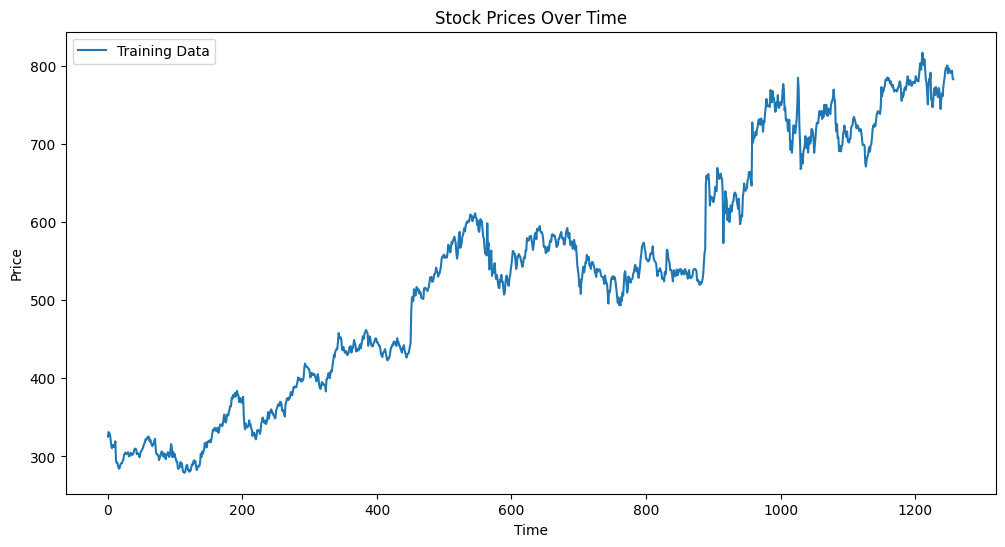

In [48]:
plt.figure(figsize=(12, 6))

# Plotting the 'Open' prices
plt.plot(data_train['Open'], label='Training Data')
plt.title('Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
train_data = data_train.iloc[:,1:2].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
data_scaled = sc.fit_transform(train_data)

In [ ]:
x_train = []
y_train = []
sequence_length = 60

for i in range(sequence_length, len(data_scaled)):
    x_train.append(data_scaled[i - sequence_length:i, 0])
    y_train.append(data_scaled[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_val = train_test_split(data_scaled, test_size=0.2, random_state=42)

In [ ]:
# train = train_data.reshape(train_data.shape[0],1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()


In [ ]:
regressor.add(LSTM(units =50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding 2nd layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#adding 3rd layer
regressor.add(LSTM(units =50,return_sequences = True))
regressor.add(Dropout(0.2))

#adding fourth layer
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.add(Dense(units =1))


In [ ]:
regressor.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

In [ ]:
history = regressor.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.0673 - val_loss: 0.0368
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


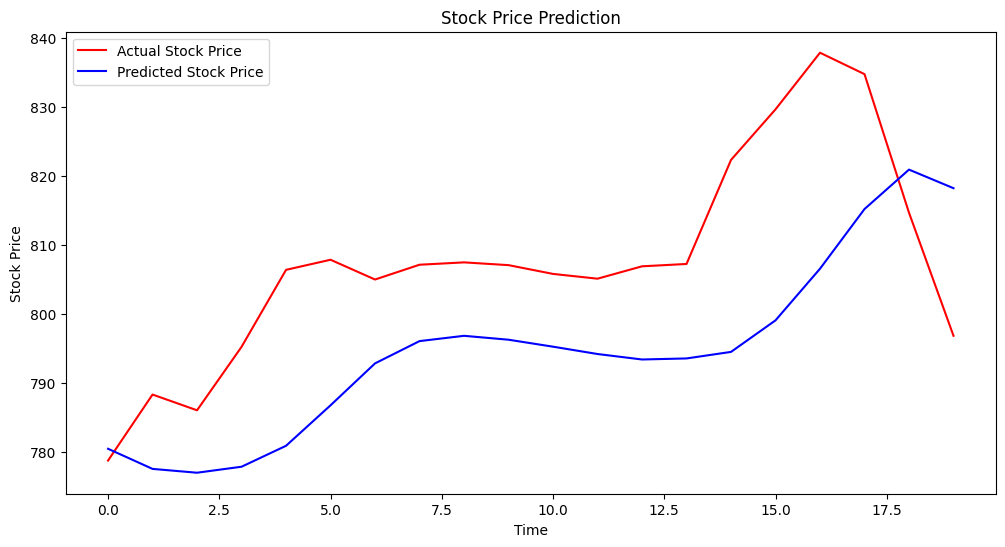

Evaluation Metrics:
MAE: 15.757944458007813
RMSE: 17.668988823898246
R2: -0.43642984753735403


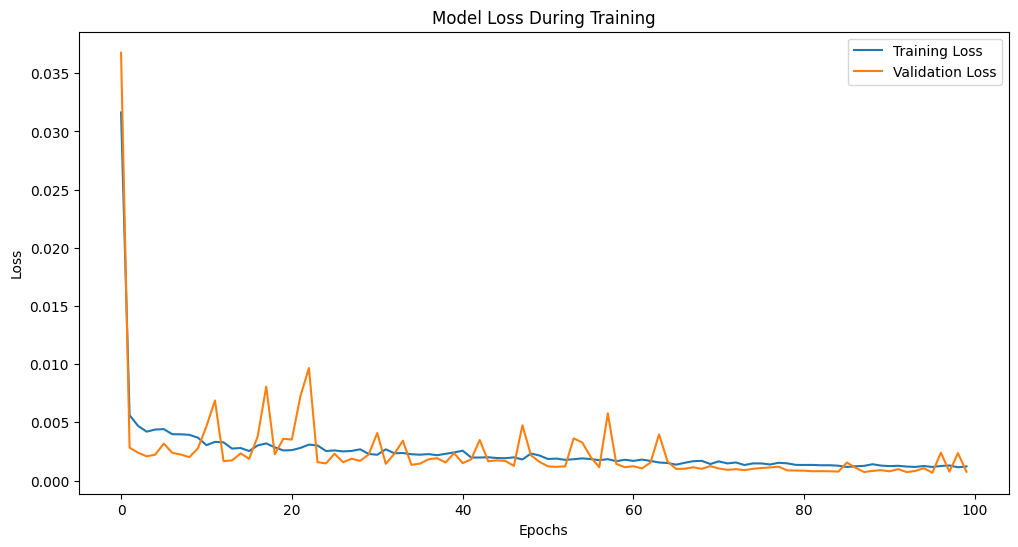

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

total_data = pd.concat((data_train['Open'], data_test['Open']), axis=0).values
inputs = total_data[len(total_data) - len(data_test) - sequence_length:].reshape(-1, 1)
inputs_scaled = sc.transform(inputs)

x_test = []
for i in range(sequence_length, len(inputs_scaled)):
    x_test.append(inputs_scaled[i - sequence_length:i, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Predicting test data
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(data_test['Open'].values, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(data_test['Open'].values, predicted_stock_price)
rmse = np.sqrt(mean_squared_error(data_test['Open'].values, predicted_stock_price))
r2 = r2_score(data_test['Open'].values, predicted_stock_price)
print(f"Evaluation Metrics:\nMAE: {mae}\nRMSE: {rmse}\nR2: {r2}")

# Display training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()